# Catedra 17

## Ejemplo

### Ecuacion de calor homogenea

$$
\frac{\partial T}{\partial t} = \alpha\frac{\partial^2 T}{\partial x^2} \qquad x \in [0, 1]
$$

- Condicion inicial: $T(x,0) = \sin(\pi x)$
- Condicion de borde: $T(0, t) = T(1, t) = 0$

Discretizacion: dibujo

In [40]:
import scipy as sp
import matplotlib.pyplot as plt
import matplotlib.cm as cm

%matplotlib notebook

In [22]:
def inicializa_T(T, N_steps, h):
    """
    Rellena T con las condiciones inciales del problema.
    Se asegura que las condiciones de borde sean 0.
    """
    for i in range(N_steps):
        x = i * h
        T[i] = sp.sin(sp.pi * x)
    T[0] = 0
    T[-1] = 0

In [23]:
def calcula_b(b, N_steps, s):
    for j in range(1, N_steps - 1):
        b[j] = s * T[j+1] + (1 - 2 * s) * T[j] + s * T[j-1] 

In [24]:
def calcula_alpha_y_beta(alpha, beta, b, s, N_steps):
    Aplus = -1 * s
    Acero = (1 + 2 * s)
    Aminus = -1 * s
    alpha[0] = 0
    beta[0] = 0  # Viene de la condicion de borde T(t, 0) = 0
    for i in range(1, N_steps):
        alpha[i] = -Aplus / (Acero + Aminus * alpha[i-1])
        beta[i] = (b[i] - Aminus * beta[i-1]) / (Aminus * alpha[i-1] + Acero)

In [25]:
def avanza_paso_temporal(T, T_next, alpha, beta, N_steps):
    T_next[0] = 0
    T_next[-1] = 0
    for i in range(N_steps - 2, 0, -1):
        T_next[i] = alpha[i] * T_next[i+1] + beta[i]

In [36]:
# Setup
N_steps = 100
N_pasos_temporales = 100

h = 1. / (N_steps - 1)
dt = 0.01  # h**2 / 2  # Este es el maximo teorico para el metodo explicito.
s = dt / 2. / h**2

T = sp.zeros(N_steps)
T_next = sp.zeros_like(T)

b = sp.zeros_like(T)
alpha = sp.zeros_like(T)
beta = sp.zeros_like(T)

# Aplicar condicion inicial

inicializa_T(T, N_steps, h)

# Queremos guardar las soluciones en cada paso.
T_solucion = sp.zeros((N_pasos_temporales, N_steps))
T_solucion[0, :] = T.copy()

for i in range(1, N_pasos_temporales):
    calcula_b(b, N_steps, s)
    calcula_alpha_y_beta(alpha, beta, b, s, N_steps)
    avanza_paso_temporal(T, T_next, alpha, beta, N_steps)
    T = T_next.copy()
    T_solucion[i, :] = T_next.copy()

<IPython.core.display.Javascript object>


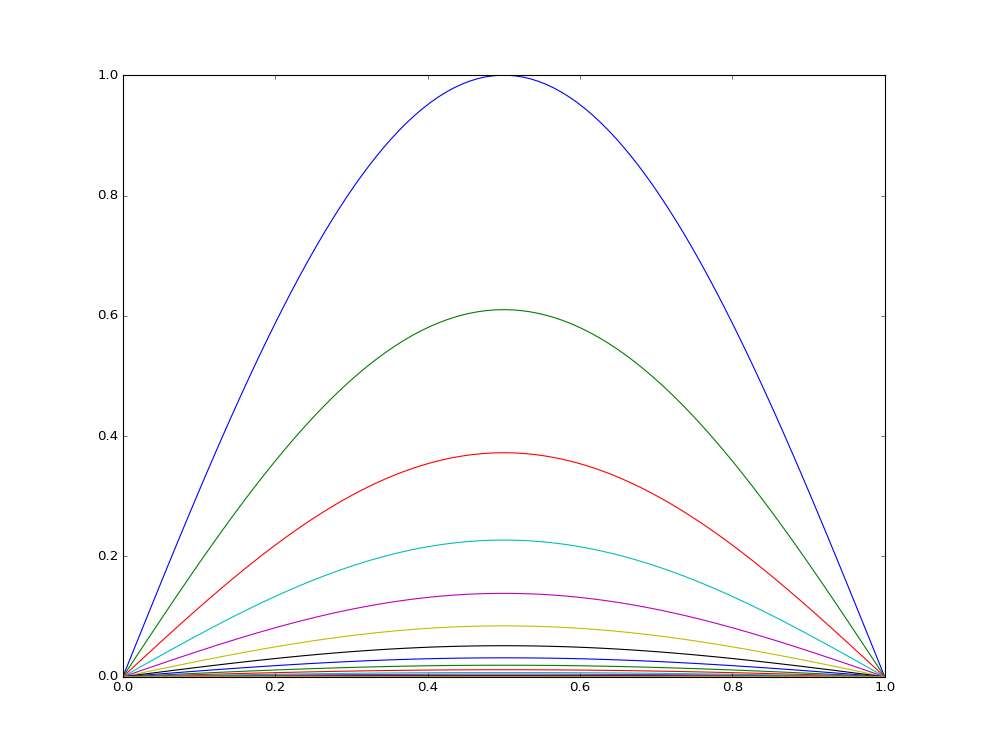

(0, 1)

In [37]:
x = sp.linspace(0, 1, N_steps)
fig = plt.figure()
ax = fig.add_subplot(111)
for i in range(0, N_pasos_temporales, 5):
    ax.plot(x, T_solucion[i, :])
ax.set_ylim(0, 1)

<IPython.core.display.Javascript object>


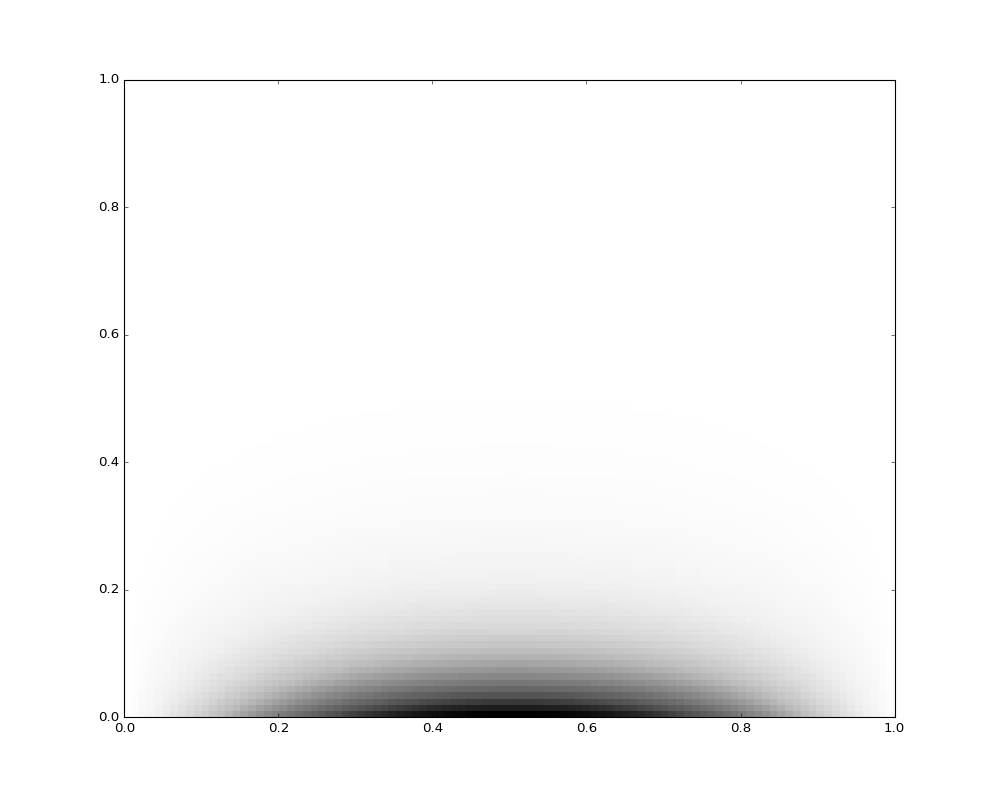

In [38]:
# ejemplo 2
# usar el plano x, t y plotear T en la 3a dimension.
fig2 = plt.figure()
ax2 = fig2.add_subplot(111)
y = sp.arange(0, N_pasos_temporales) * dt
X, Y = sp.meshgrid(x, y)
ax2.pcolormesh(X, Y, T_solucion, cmap=cm.Greys)

plt.draw()